In [1]:
import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
from matplotlib.collections import LineCollection
from sklearn import cluster, covariance, manifold

In [3]:
from datetime import datetime

In [4]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
import os

In [6]:
Kospi200_codes = { #정지된 두 종목은 제외, 총 198종목
    '5930':'삼성전자',
    '660':'SK하이닉스',
    '5380':'현대차',
    '15760':'한국전력',
    '35420':'NAVER',
    '28260':'삼성물산',
    '5490':'POSCO',
    '55550':'신한지주',
    '32830':'삼성생명',
    '12330':'현대모비스',
    '105560':'KB금융',
    '51910':'LG화학',
    '17670':'SK텔레콤',
    '90430':'아모레퍼시픽',
    '34730':'SK',
    '96770':'SK이노베이션',
    '51900':'LG생활건강',
    '270':'기아차',
    '33780':'KT&G',
    '810':'삼성화재',
    '11170':'롯데케미칼',
    '86790':'하나금융지주',
    '3550':'LG',
    '66570':'LG전자',
    '2790':'아모레G',
    '10950':'S-Oil',
    '18260':'삼성에스디에스',
    '34220':'LG디스플레이',
    '30':'우리은행',
    '6400':'삼성SDI',
    '30200':'KT',
    '36570':'엔씨소프트',
    '23530':'롯데쇼핑',
    '21240':'코웨이',
    '10130':'고려아연',
    '35250':'강원랜드',
    '4020':'현대제철',
    '161390':'한국타이어',
    '24110':'기업은행',
    '139480':'이마트',
    '6800':'미래에셋대우',
    '47810':'한국항공우주',
    '32640':'LG유플러스',
    '9150':'삼성전기',
    '86280':'현대글로비스',
    '1040':'CJ',
    '78930':'GS',
    '88350':'한화생명',
    '27410':'BGF리테일',
    '720':'현대건설',
    '9240':'한샘',
    '4800':'효성',
    '5830':'동부화재',
    '29780':'삼성카드',
    '18880':'한온시스템',
    '97950':'CJ제일제당',
    '10140':'삼성중공업',
    '36460':'한국가스공사',
    '1800':'오리온',
    '9830':'한화케미칼',
    '7070':'GS리테일',
    '5940':'NH투자증권',
    '120':'CJ대한통운',
    '8930':'한미사이언스',
    '12750':'에스원',
    '2380':'KCC',
    '128940':'한미약품',
    '12630':'현대산업',
    '1450':'현대해상',
    '16360':'삼성증권',
    '138930':'BNK금융지주',
    '3490':'대한항공',
    '47040':'대우건설',
    '11070':'LG이노텍',
    '880':'한화',
    '47050':'포스코대우',
    '4990':'롯데제과',
    '71050':'한국금융지주',
    '210':'대림산업',
    '100':'유한양행',
    '12450':'한화테크윈',
    '51600':'한전KPS',
    '69960':'현대백화점',
    '7310':'오뚜기',
    '34020':'두산중공업',
    '11780':'금호석유',
    '28050':'삼성엔지니어링',
    '6260':'LS',
    '8770':'호텔신라',
    '8560':'메리츠종금증권',
    '204320':'만도',
    '5300':'롯데칠성',
    '30000':'제일기획',
    '4170':'신세계',
    '1740':'SK네트웍스',
    '150':'두산',
    '42670':'두산인프라코어',
    '4370':'농심',
    '6280':'녹십자',
    '10060':'OCI',
    '240':'한국타이어월드와이드',
    '10620':'현대미포조선',
    '64350':'현대로템',
    '5610':'SPC삼립',
    '161890':'한국콜마',
    '11210':'현대위아',
    '120110':'코오롱인더',
    '670':'영풍',
    '17800':'현대엘리베이',
    '3520':'영진약품',
    '5440':'현대그린푸드',
    '6650':'대한유화',
    '10120':'LS산전',
    '6120':'SK케미칼',
    '111770':'영원무역',
    '192820':'코스맥스',
    '57050':'현대홈쇼핑',
    '80':'하이트진로',
    '10780':'아이에스동서',
    '114090':'GKL',
    '14820':'동원시스템즈',
    '2350':'넥센타이어',
    '192400':'쿠쿠전자',
    '1120':'LG상사',
    '73240':'금호타이어',
    '3410':'쌍용양회',
    '103140':'풍산',
    '185750':'종근당',
    '70':'삼양홀딩스',
    '11790':'SKC',
    '105630':'한세실업',
    '1230':'동국제강',
    '69620':'대웅제약',
    '3620':'쌍용차',
    '49770':'동원F&B',
    '2620':'제일약품',
    '4000':'롯데정밀화학',
    '1430':'세아베스틸',
    '3240':'태광산업',
    '145990':'삼양사',
    '990':'동부하이텍',
    '69260':'휴켐스',
    '3000':'부광약품',
    '14680':'한솔케미칼',
    '108670':'LG하우시스',
    '52690':'한전기술',
    '3300':'한일시멘트',
    '2270':'롯데푸드',
    '640':'동아쏘시오홀딩스',
    '1680':'대상',
    '1060':'JW중외제약',
    '170900':'동아에스티',
    '115390':'락앤락',
    '20000':'한섬',
    '25540':'한국단자',
    '93050':'LF',
    '7570':'일양약품',
    '19680':'대교',
    '93370':'후성',
    '20150':'일진머티리얼즈',
    '2240':'고려제강',
    '5180':'빙그레',
    '33920':'무학',
    '9420':'한올바이오파마',
    '64960':'S&T모티브',
    '60980':'한라홀딩스',
    '3920':'남양유업',
    '3030':'세아제강',
    '5850':'에스엘',
    '7340':'동아타이어',
    '29530':'신도리코',
    '2960':'한국쉘석유',
    '4490':'세방전지',
    '1520':'동양',
    '78520':'에이블씨엔씨',
    '25860':'남해화학',
    '79430':'현대리바트',
    '36580':'팜스코',
    '8060':'대덕전자',
    '34120':'SBS',
    '9290':'광동제약',
    '3850':'보령제약',
    '8490':'서흥',
    '14830':'유니드',
    '50':'경방',
    '97230':'한진중공업',
    '104700':'한국철강',
    '4710':'한솔테크닉스',
    '1780':'알루코',
    '5740':'크라운해태홀딩스',
    '3570':'S&T중공업',
    '5090':'삼광글라스',
    '7690':'국도화학',
    '3200':'일신방직',
    '7210':'벽산',
    '140':'하이트진로홀딩스',
    '4700':'조광피혁',
    '230':'일동홀딩스',
}

In [7]:
Kospi200Code, names = np.array(list(Kospi200_codes.items())).T

# 데이터 로드

In [8]:
total = pd.DataFrame(columns=['code', 'date', 'open', 'close'])

for root, dirs, files in os.walk('../../Stock_data/Kospi_day/'):
    for file in files:
        try:
            result = pd.read_table('../../Stock_data/Kospi_day/%s'%(file), sep='\s')
            total=pd.concat([total, result], axis=0)
        except Exception:
            continue

C:\Users\KyeoRae\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


# 1985~2016 전체 데이터

In [20]:
# total['code']= total['code'].map(lambda x : int(x))
total['date']= total['date'].map(lambda x : datetime.strptime(str(x), "%Y%m%d").date())

# 2000~2016 데이터

In [21]:
range_2000=pd.date_range('20000101', '20161229', freq='D')
range_2000=range_2000.date
total_from2000 = pd.DataFrame(columns=['code', 'date', 'open', 'close'])
total_from2000=total[total['date'].map(lambda x:x in range_2000)]

# 2010~2016 데이터

In [9]:
range_2010=pd.date_range('20100101', '20161229', freq='D')
range_2010=range_2010.date
total_from2010 = pd.DataFrame(columns=['code', 'date', 'open', 'close'])
total_from2010=total[total['date'].map(lambda x:x in range_2010)]

## 각 기간별 코드 

In [15]:
dic= dict(list(total.groupby('code')))
dic2000= dict(list(total_from2000.groupby('code')))
dic2010= dict(list(total_from2010.groupby('code')))

# Total, 1985~2016

In [38]:
#total 1985~2016
anal_total = []
names_total = []
for key in dic.keys():
    value = dic[key]
    if str(key) in Kospi200_codes.keys():
        names_total.append(Kospi200_codes[str(key)])
        value = value.to_records(index=False, convert_datetime64=True)
        value.sort()
    #     print(len(value))
        if(len(value) == 8551):
            anal_total.append(value)

C:\Users\KyeoRae\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'convert_datetime64' parameter is deprecated and will be removed in a future version
  


## 클러스터링

In [47]:
#total 1985~2016
open = np.array([q.open for q in anal_total]).astype(np.float)
close = np.array([q.close for q in anal_total]).astype(np.float)
variation = close - open
edge_model = covariance.GraphLassoCV()
names_total = np.array(names_total)
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class GraphLassoCV is deprecated; The 'GraphLassoCV' was renamed to 'GraphicalLassoCV' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GraphLassoCV(alphas=4, assume_centered=False, cv='warn', enet_tol=0.0001,
             max_iter=100, mode='cd', n_jobs=None, n_refinements=4, tol=0.0001,
             verbose=False)

In [48]:
_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

In [49]:
print('*****************total 1985 ~ 2016*****************')
for i in range(n_labels + 1):
    tmp = []
    for ix, label in enumerate(labels):
        if label == i:
            tmp.append(ix)
    tmp2 = []
    for ix in tmp:
        tmp2.append(names[ix])
    print('cluster {}: {}'.format(i + 1, ', '.join(tmp2)))

*****************total 1985 ~ 2016*****************
cluster 1: 삼성전자
cluster 2: 삼성생명, 현대모비스, 삼성화재, KT, 이마트, 한샘
cluster 3: SK하이닉스, 한국전력, LG화학, SK이노베이션, 기아차, 하나금융지주, 미래에셋대우, 한국항공우주
cluster 4: 현대차, 신한지주, SK텔레콤, LG디스플레이
cluster 5: LG전자
cluster 6: KB금융, SK, 아모레G, S-Oil
cluster 7: 고려아연
cluster 8: 엔씨소프트, 코웨이, 현대제철, 한국타이어, 기업은행
cluster 9: NAVER, LG생활건강, 현대글로비스, BGF리테일
cluster 10: 삼성물산, POSCO, 아모레퍼시픽, KT&G, 롯데케미칼, LG, 삼성에스디에스, 우리은행, 삼성SDI, 롯데쇼핑, 강원랜드, LG유플러스, CJ, GS, 효성
cluster 11: 삼성전기, 한화생명, 현대건설


In [50]:
#total
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=10)

embedding = node_position_model.fit_transform(X.T).T

## 시각화

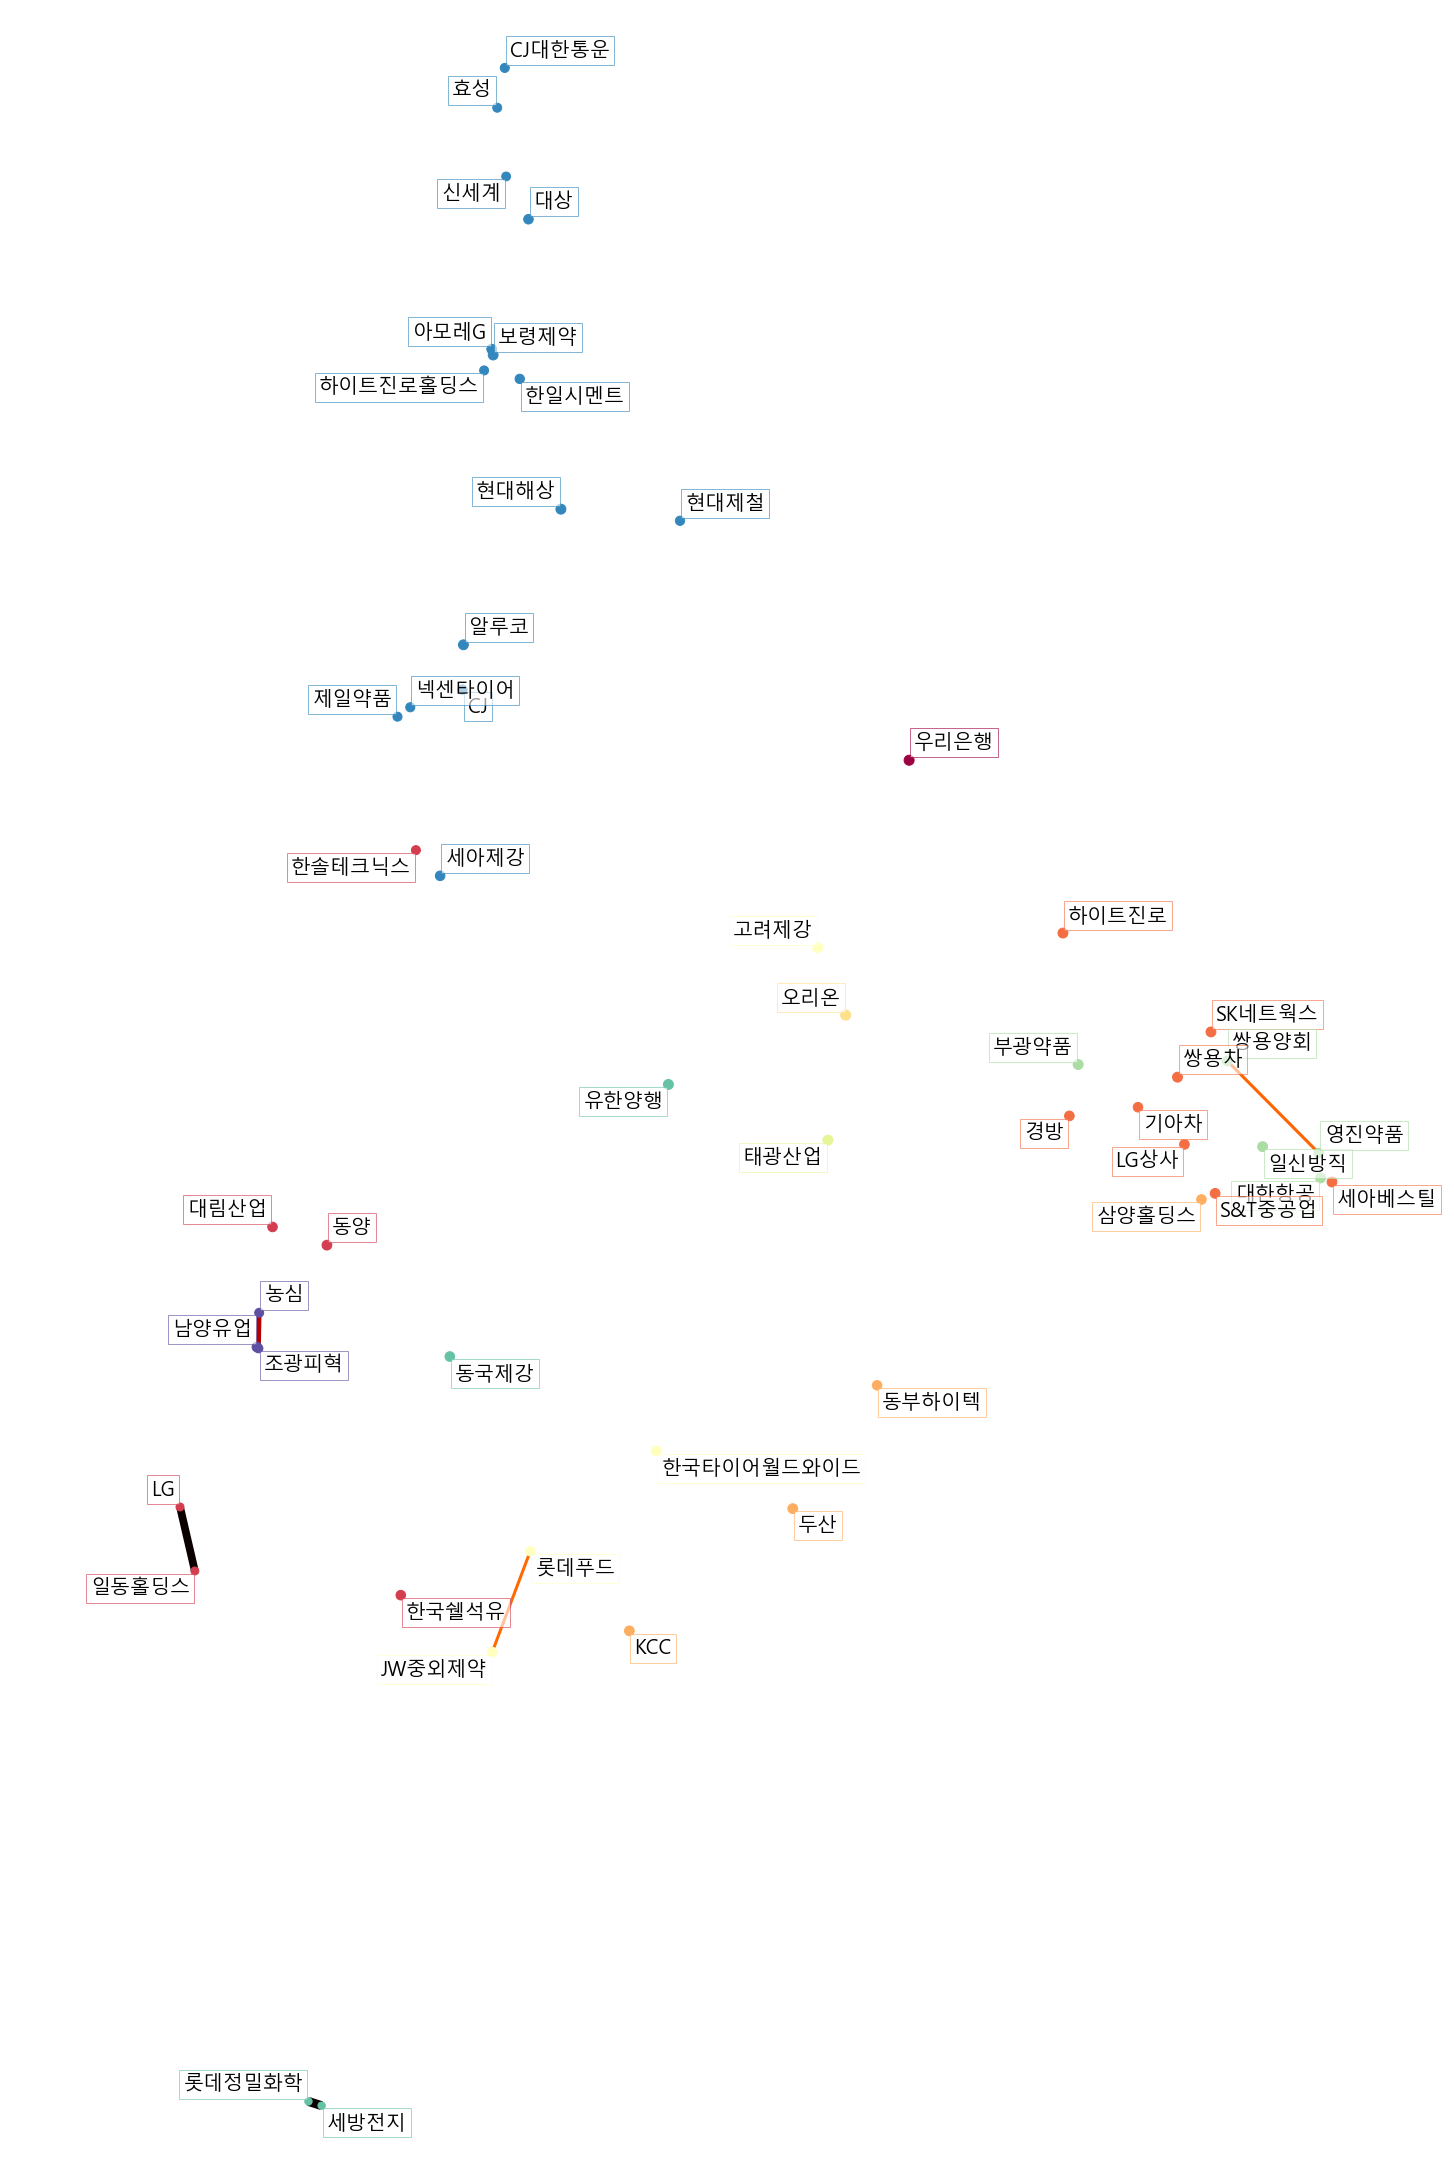

In [52]:
#total 1985~2016
plt.figure(1, facecolor='w', figsize=(20, 30))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.2)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.Spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names_total, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=20, #글자 크기
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.Spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

# 2000~2016

In [56]:
#2000~2016
anal_total2000 = []
names_total2000 = []
for key in dic2000.keys():
    value = dic2000[key]
    if str(key) in Kospi200_codes.keys():
        names_total2000.append(Kospi200_codes[str(key)])
        value = value.to_records(index=False, convert_datetime64=True)
        value.sort()
    #     print(len(value))
        if(len(value) == 4203):
            anal_total2000.append(value)

C:\Users\KyeoRae\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'convert_datetime64' parameter is deprecated and will be removed in a future version
  


## 클러스터링

In [57]:
#2000~2016
open = np.array([q.open for q in anal_total2000]).astype(np.float)
close = np.array([q.close for q in anal_total2000]).astype(np.float)
variation2000 = close - open
edge_model2000 = covariance.GraphLassoCV()
names_total2000 = np.array(names_total2000)
X2000 = variation2000.copy().T
X2000 /= X2000.std(axis=0)
edge_model2000.fit(X2000)

C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class GraphLassoCV is deprecated; The 'GraphLassoCV' was renamed to 'GraphicalLassoCV' in version 0.20 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\KyeoRae\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GraphLassoCV(alphas=4, assume_centered=False, cv='warn', enet_tol=0.0001,
             max_iter=100, mode='cd', n_jobs=None, n_refinements=4, tol=0.0001,
             verbose=False)

In [58]:
_, labels2000 = cluster.affinity_propagation(edge_model2000.covariance_)
n_labels2000 = labels2000.max()

In [59]:
print('*****************total 2000~2016*****************')
for i in range(n_labels2000 + 1):
    tmp = []
    for ix, label in enumerate(labels2000):
        if label == i:
            tmp.append(ix)
    tmp2 = []
    for ix in tmp:
        tmp2.append(names_total2000[ix])
    print('cluster {}: {}'.format(i + 1, ', '.join(tmp2)))

*****************total 2000~2016*****************
cluster 1: 우리은행
cluster 2: 하이트진로, 기아차, 현대해상, 대상, 현대그린푸드, 현대엘리베이
cluster 3: KCC
cluster 4: 한국쉘석유
cluster 5: SK네트웍스, 부광약품, S&T중공업
cluster 6: 세아제강, 일신방직
cluster 7: JW중외제약, LG상사, 아모레G, 보령제약, 현대제철, 롯데칠성
cluster 8: 신세계
cluster 9: 한솔테크닉스
cluster 10: 알루코, 롯데정밀화학, 조광피혁, 효성, 롯데제과, 한솔케미칼
cluster 11: 대림산업, 일동홀딩스, 오리온, 삼광글라스, SPC삼립, 아이에스동서
cluster 12: 넥센타이어, 현대차, 대한유화, GS리테일, 금호석유
cluster 13: 동국제강, POSCO
cluster 14: 쌍용양회, 쌍용차, 세방전지, 에스엘, 삼성전자, 삼성전기, 한샘
cluster 15: 유한양행, 한국타이어월드와이드, 세아베스틸, 동양, 태광산업, 영진약품, 남양유업, 동부화재, 녹십자, 미래에셋대우, 롯데케미칼, 현대모비스, 에스원, 유니드, 삼성증권
cluster 16: 경방, 삼양홀딩스, 두산, 동부하이텍, 롯데푸드, 제일약품, 한일시멘트, LG, NH투자증권, 대덕전자, 메리츠종금증권, 호텔신라
cluster 17: 농심, 크라운해태홀딩스, SK케미칼, 삼성SDI, 서흥, S-Oil
cluster 18: CJ대한통운, 하이트진로홀딩스, 고려제강, 대한항공, 빙그레, 한올바이오파마, 한화케미칼, LG이노텍, 현대산업
cluster 19: OCI
cluster 20: CJ, LS, 한미사이언스, 광동제약, LS산전, 고려아연, 삼성중공업, 현대미포조선
cluster 21: 현대위아
cluster 22: SKC, 한화테크윈, SK텔레콤
cluster 23: 동원시스템즈
cluster 24: 한국전력


In [60]:
#2000~2016
node_position_model2000 = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=10)

embedding2000 = node_position_model2000.fit_transform(X2000.T).T

## 시각화

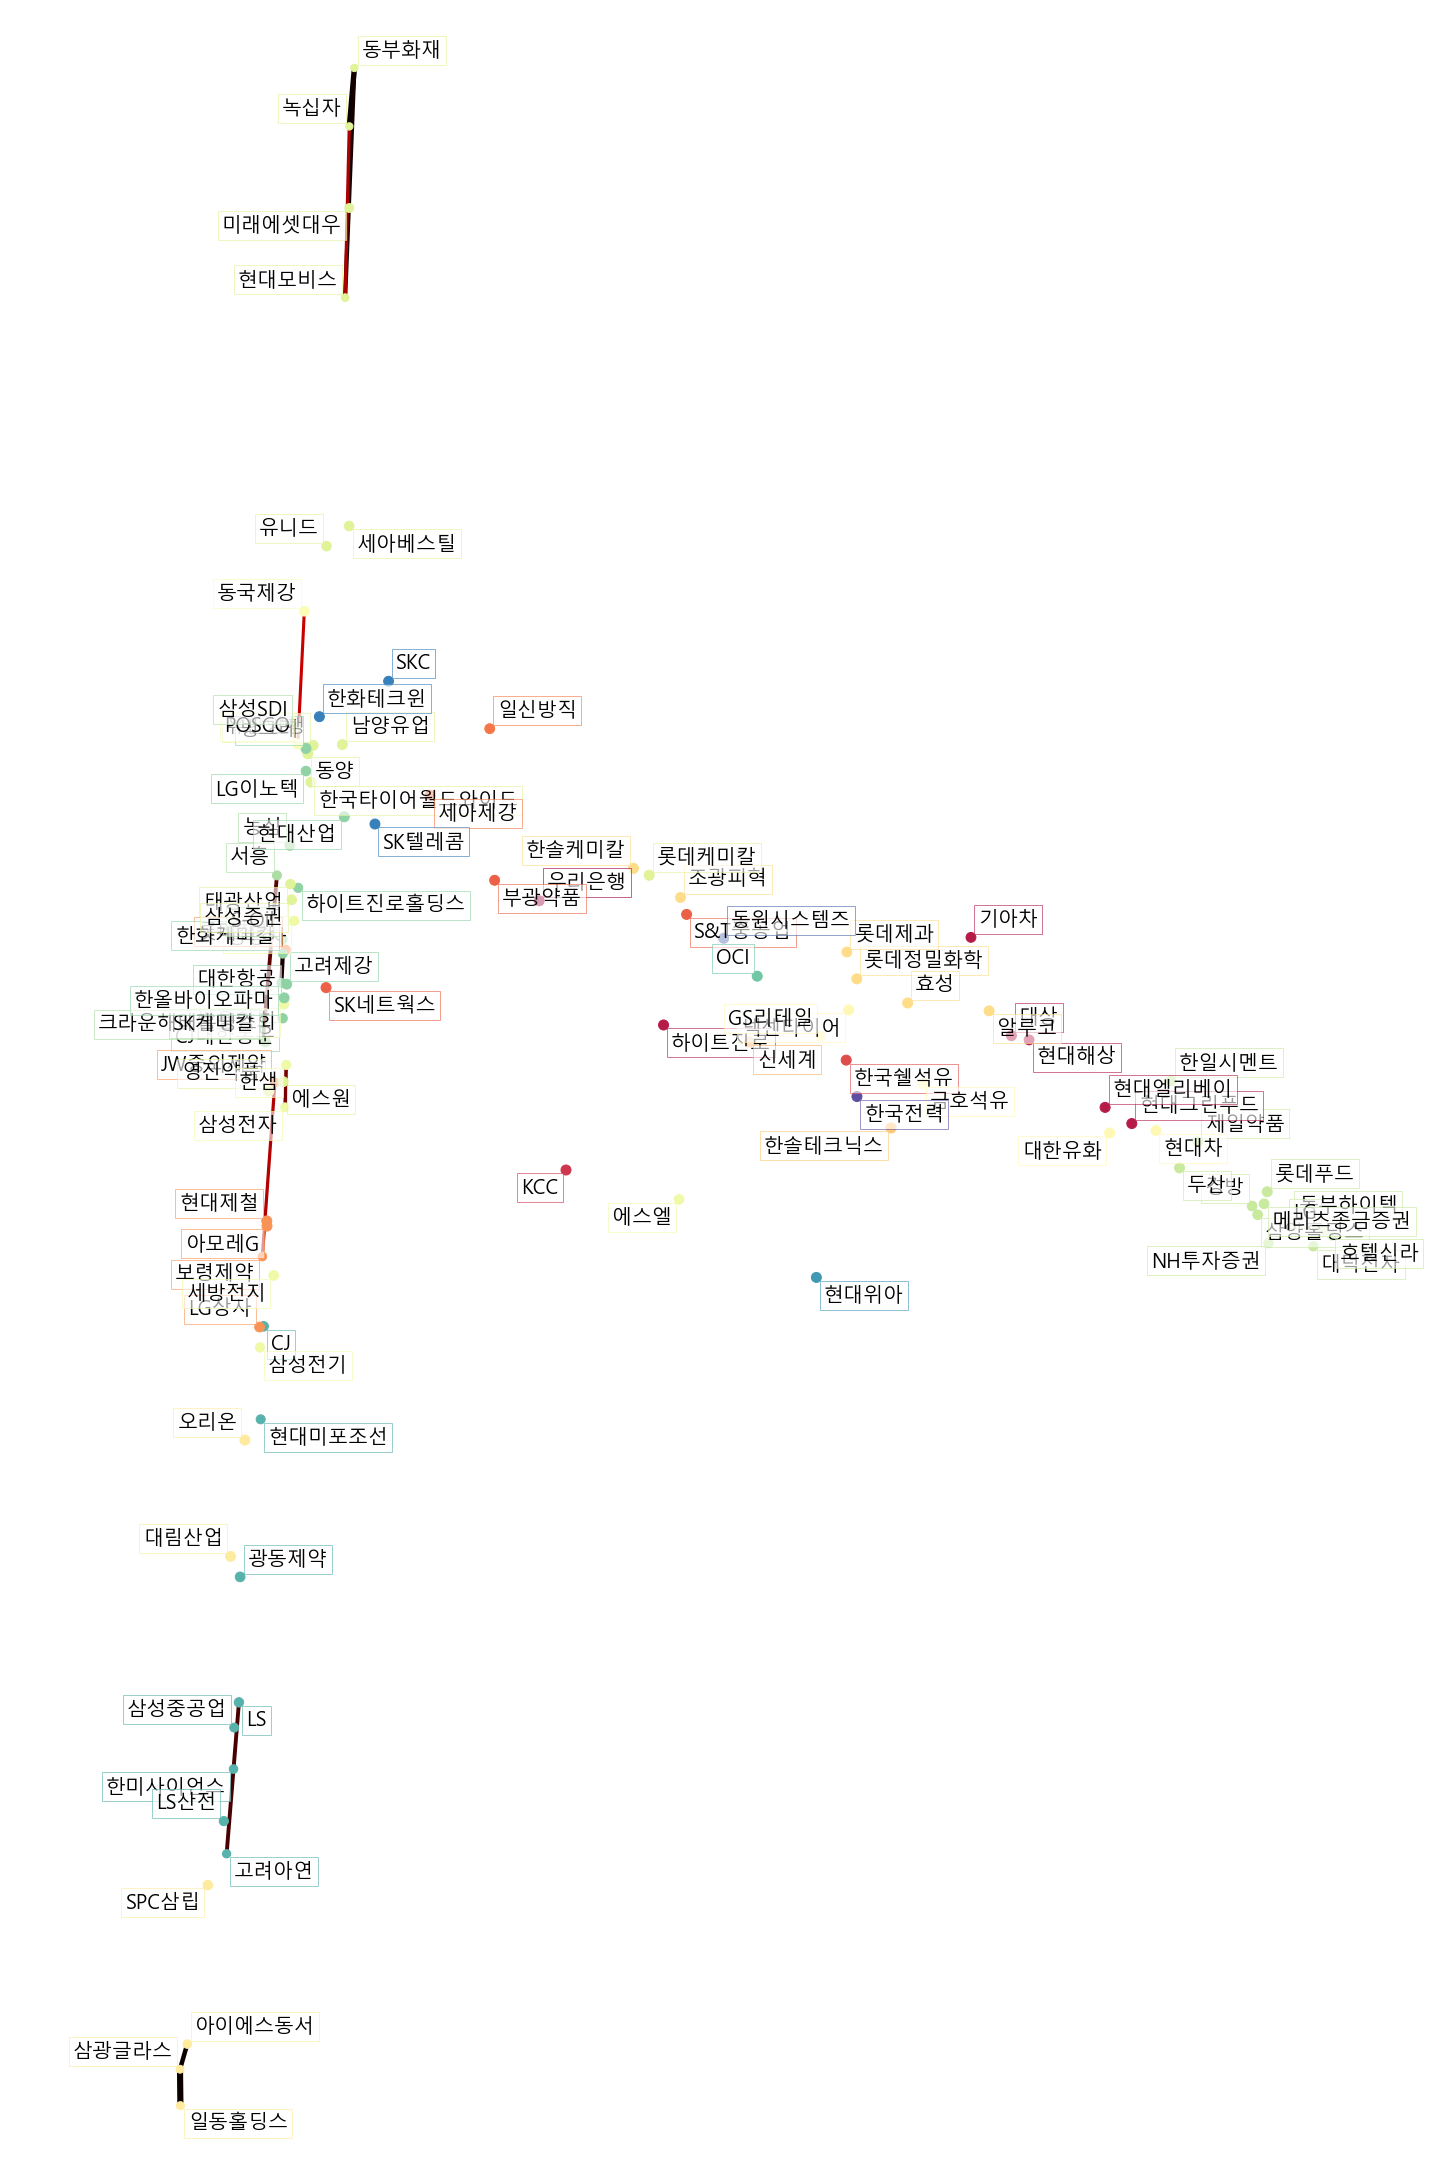

In [61]:
#2000~2016
plt.figure(1, facecolor='w', figsize=(20, 30))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model2000.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.2)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding2000[0], embedding2000[1], s=100 * d ** 2, c=labels2000,
            cmap=plt.cm.Spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding2000[:, start], embedding2000[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names_total2000, labels2000, embedding2000.T)):

    dx = x - embedding2000[0]
    dx[index] = 1
    dy = y - embedding2000[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=20, #글자 크기
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.Spectral(label / float(n_labels2000)),
                       alpha=.6))

plt.xlim(embedding2000[0].min() - .15 * embedding2000[0].ptp(),
         embedding2000[0].max() + .10 * embedding2000[0].ptp(),)
plt.ylim(embedding2000[1].min() - .03 * embedding2000[1].ptp(),
         embedding2000[1].max() + .03 * embedding2000[1].ptp())

plt.show()

# 2010~2016

In [16]:
#2010~2016
anal_total2010 = []
names_total2010 = []
for key in dic2010.keys():
    value = dic2010[key]
    if str(key) in Kospi200_codes.keys():
        names_total2010.append(Kospi200_codes[str(key)])
        value = value.to_records(index=False, convert_datetime64=True)
        value.sort()
    #     print(len(value))
        if(len(value) == 1733):
            anal_total2010.append(value)

## 클러스터링

In [19]:
#2010~2016
open = np.array([q.open for q in anal_total2010]).astype(np.float)
close = np.array([q.close for q in anal_total2010]).astype(np.float)
variation2010 = close - open
edge_model2010 = covariance.GraphLassoCV()
names_total2010 = np.array(names_total2010)
X2010 = variation2010.copy().T
X2010 /= X2010.std(axis=0)
edge_model2010.fit(X2010)

In [64]:
_, labels2010 = cluster.affinity_propagation(edge_model2010.covariance_)
n_labels2010 = labels2010.max()

In [66]:
print('*****************total 2010~2016*****************')
for i in range(n_labels2010 + 1):
    tmp = []
    for ix, label in enumerate(labels2010):
        if label == i:
            tmp.append(ix)
    tmp2 = []
    for ix in tmp:
        tmp2.append(names_total2010[ix])
    print('cluster {}: {}'.format(i + 1, ', '.join(tmp2)))

*****************total 2010~2016*****************
cluster 1: 우리은행
cluster 2: 삼양홀딩스, CJ대한통운
cluster 3: 한국타이어월드와이드, 롯데칠성, 동부화재, 현대위아, 삼성증권, S&T모티브
cluster 4: 세아베스틸, 크라운해태홀딩스
cluster 5: 현대해상
cluster 6: 일동홀딩스, 롯데푸드, 신한지주
cluster 7: 넥센타이어, 한화생명
cluster 8: 아모레G
cluster 9: 세아제강
cluster 10: 태광산업, 한일시멘트, 현대산업
cluster 11: S&T중공업
cluster 12: 일신방직, 보령제약
cluster 13: LG상사, 동국제강, 롯데정밀화학, 현대그린푸드, GS, 현대리바트
cluster 14: 롯데제과
cluster 15: 고려제강, 신세계, 효성, 삼광글라스, 빙그레
cluster 16: 현대차
cluster 17: 기아차, 쌍용양회, 삼성전자, 대한유화, 대덕전자, SKC, 현대모비스, 동원시스템즈, 강원랜드, 한전기술
cluster 18: 경방, 하이트진로, 대림산업, CJ, SK네트웍스, KCC, 한국쉘석유, 대한항공, 쌍용차, LS, 메리츠종금증권, 삼성전기, 한샘, LG생활건강
cluster 19: 남양유업, 농심, 조광피혁, 에스엘, 녹십자, 미래에셋대우, 호텔신라, 아이에스동서, 금호석유
cluster 20: POSCO, 한미사이언스, 남해화학, 한국가스공사, 현대로템
cluster 21: SK케미칼, 한화케미칼
cluster 22: LS산전, 고려아연, 금호타이어
cluster 23: 오리온, 세방전지, SPC삼립, 삼성중공업
cluster 24: JW중외제약, 영진약품, 한솔테크닉스, NH투자증권, 삼성SDI, 광동제약, 한올바이오파마, OCI, 현대미포조선, S-Oil, LG이노텍, 롯데케미칼, 에스원, 두산인프라코어, 한라홀딩스, 현대백화점, 한국금융지주
cluster 25: 한화테크윈
cluster 26: 한솔케미

In [67]:
#2010~2016
node_position_model2010 = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=30)

embedding2010 = node_position_model2010.fit_transform(X2010.T).T

## 시각화

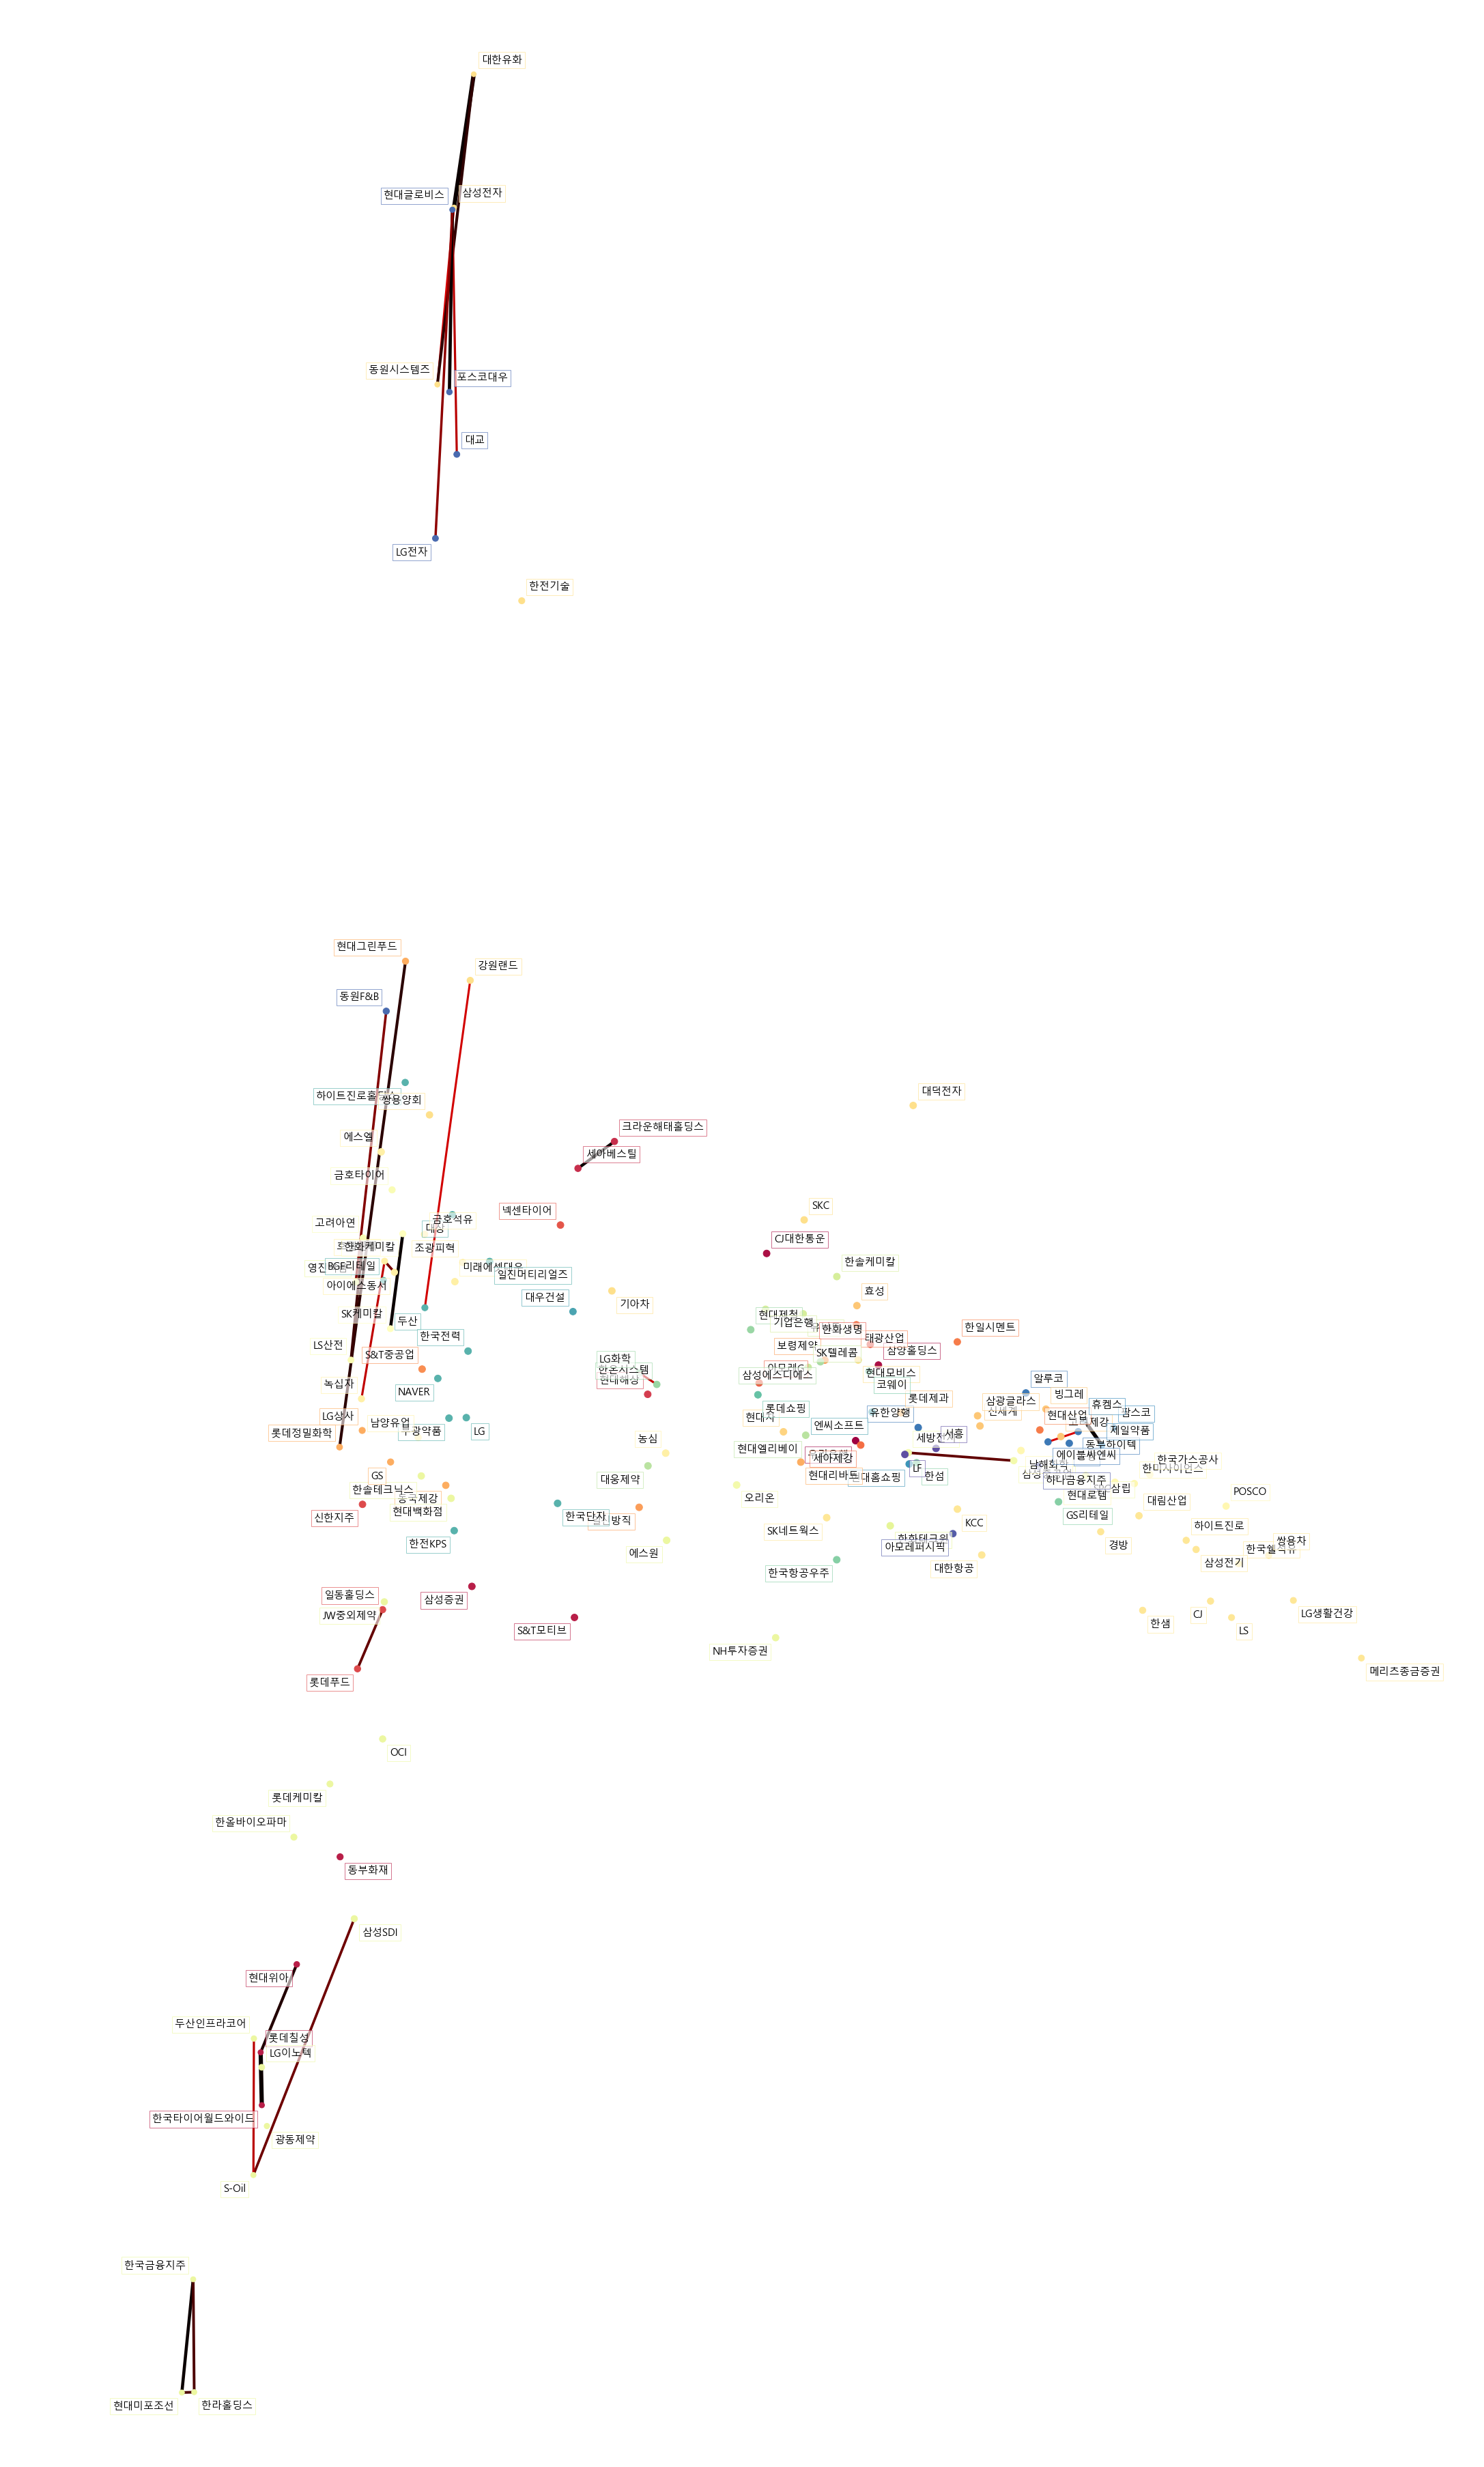

In [68]:
#2010~2016
plt.figure(1, facecolor='w', figsize=(30, 50))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model2010.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.2)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding2010[0], embedding2010[1], s=100 * d ** 2, c=labels2010,
            cmap=plt.cm.Spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding2010[:, start], embedding2010[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names_total2010, labels2010, embedding2010.T)):

    dx = x - embedding2010[0]
    dx[index] = 1
    dy = y - embedding2010[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=15, #글자 크기
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.Spectral(label / float(n_labels2010)),
                       alpha=.6))

plt.xlim(embedding2010[0].min() - .15 * embedding2010[0].ptp(),
         embedding2010[0].max() + .10 * embedding2010[0].ptp(),)
plt.ylim(embedding2010[1].min() - .03 * embedding2010[1].ptp(),
         embedding2010[1].max() + .03 * embedding2010[1].ptp())

plt.show()